<a href="https://colab.research.google.com/github/ONowakowski/howToDataInPython/blob/master/seaborn_how_to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Dane - Tips

In [64]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [7]:
df.describe(include='category').T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


Wykres relacyjny (*relplot*)

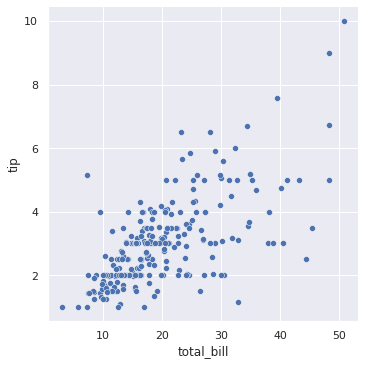

In [11]:
#relacja calkowitego rachunku do calkowitego napiwku
_ = sns.relplot(data=df, x='total_bill', y='tip')

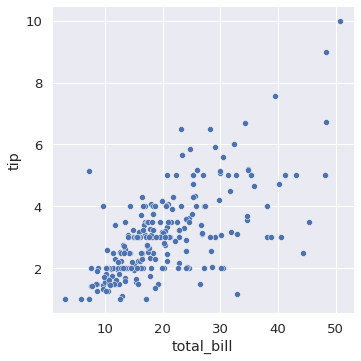

In [12]:
sns.set(font_scale=1.2) #zwiekszenie czcionki
_ = sns.relplot(data=df, x='total_bill', y='tip')

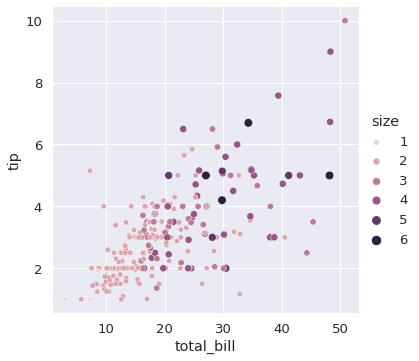

In [14]:
#dodam trzeci wymiar, tym razem rozmiar grupy, trzeci wymiar to parametr size
_ = sns.relplot(data=df, x='total_bill', y='tip', size='size', hue='size') #srednica punktow oraz kolor okreslaja wielkosc size

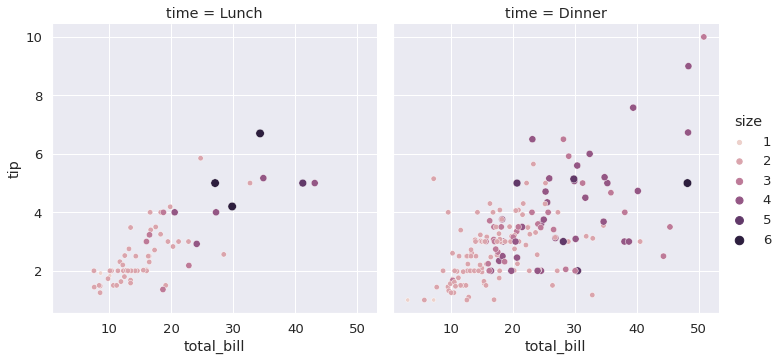

In [15]:
_ = sns.relplot(data=df, x='total_bill', y='tip', size='size', hue='size', col='time') #jesli w col wrzucimy zmienna kategoryczna to nam rozbije to na dwa wykresy 

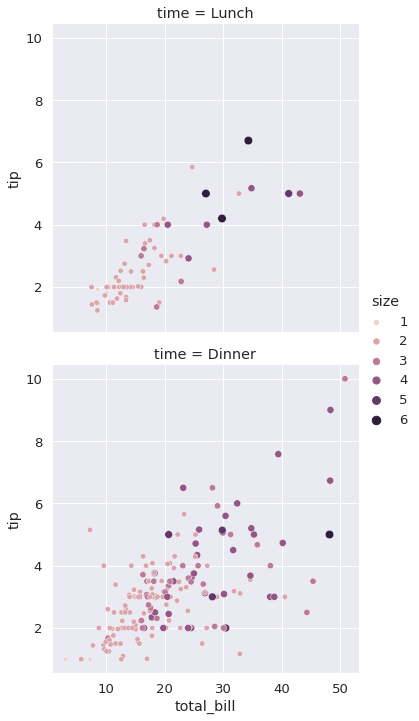

In [16]:
_ = sns.relplot(data=df, x='total_bill', y='tip', size='size', hue='size', row='time') #lub row

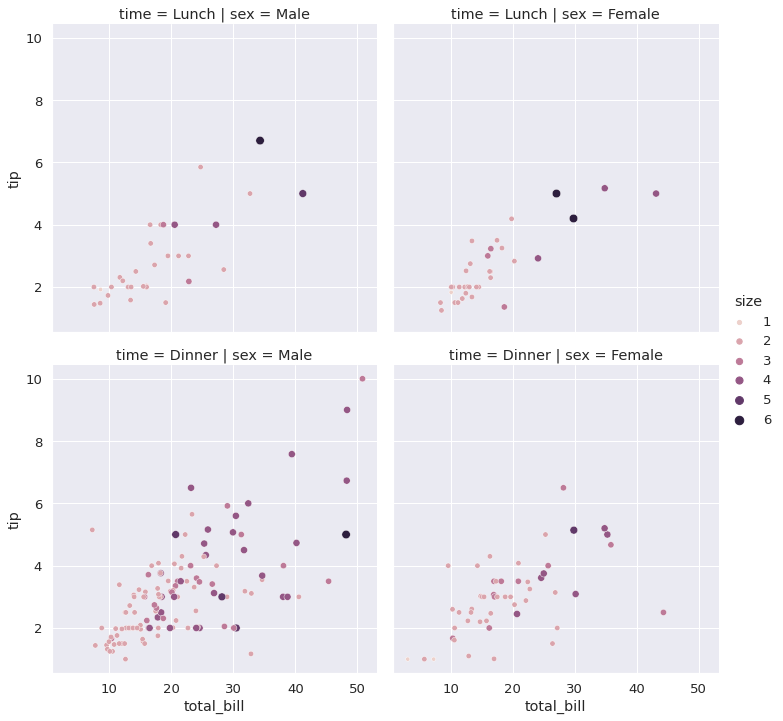

In [17]:
_ = sns.relplot(data=df, x='total_bill', y='tip', size='size', hue='size', row='time', col='sex') #lub obydwa na raz

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


Wykres *catplot*

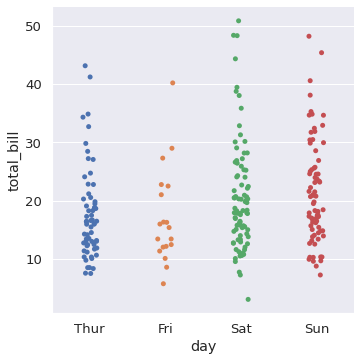

In [21]:
_ = sns.catplot(data=df, x='day', y='total_bill')

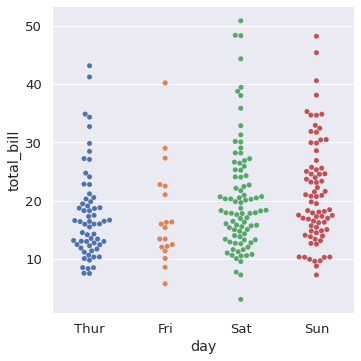

In [23]:
_ = sns.catplot(data=df, x='day', y='total_bill', kind='swarm') #swarm - tu widzimy wartosci czesciej sie powtarzajace

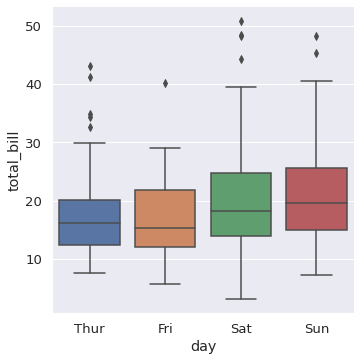

In [25]:
_ = sns.catplot(data=df, x='day', y='total_bill', kind='box') #box - wykres pudelkowy

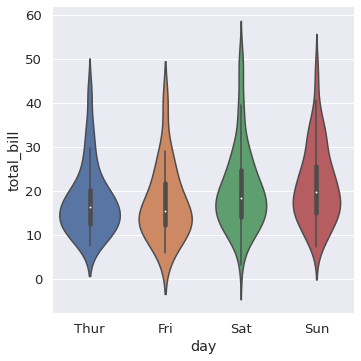

In [26]:
_ = sns.catplot(data=df, x='day', y='total_bill', kind='violin') 

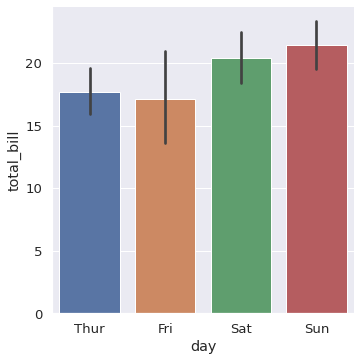

In [27]:
_ = sns.catplot(data=df, x='day', y='total_bill', kind='bar')

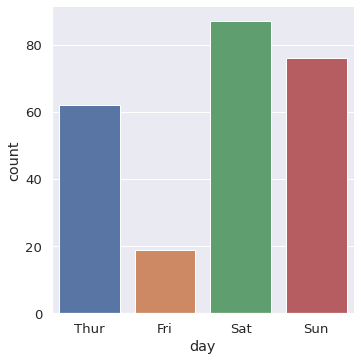

In [28]:
_ = sns.catplot(data=df, x='day', kind='count') #bez osi y, w kind wpisujemy count i liczy w ktore dni najwiecej jest zamowien

Dodamy kolumne ze srednim rachunkiem na jednego klienta

In [33]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
df['mean_bill'] = round(df.total_bill/df['size'],2) #trzeba uwazac bo df.size odnosi sie do innego atrybutu niz nazwa kolumny
df.head()

,total_bill,tip,sex,smoker,day,time,size,mean_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15


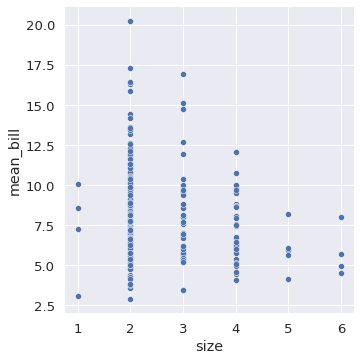

In [50]:
#wykres zaleznosci wielkosci grupy od srednich wydatkow
_ = sns.relplot(data=df, x='size', y='mean_bill')

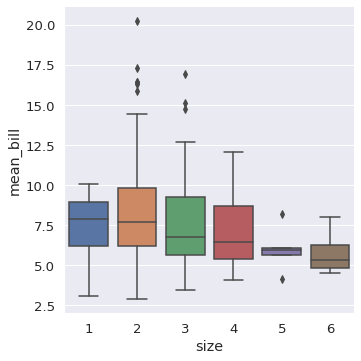

In [66]:
#to samo catplotem
_ = sns.catplot(data=df, x='size', y='mean_bill', kind ='box')

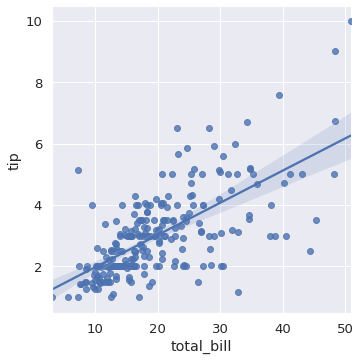

In [67]:
#model liniowy
_ = sns.lmplot(data=df, x='total_bill', y='tip')

#Dane - Titanic

In [52]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


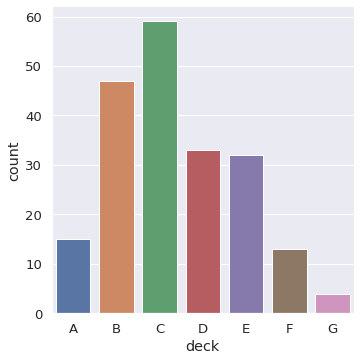

In [55]:
#czestotliwosc wystepowania danego pokladu
_ = sns.catplot(data=df, x='deck', kind='count')

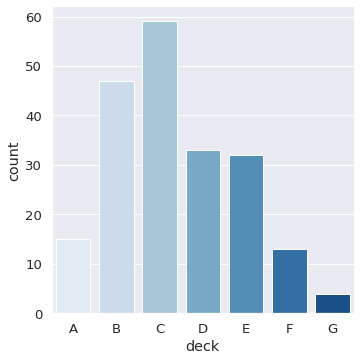

In [56]:
_ = sns.catplot(data=df, x='deck', kind='count', palette='Blues')

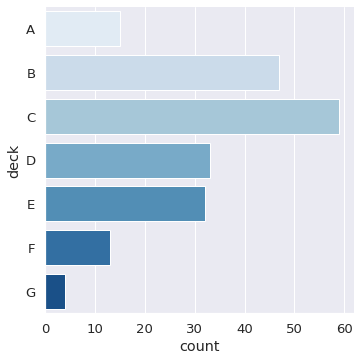

In [57]:
_ = sns.catplot(data=df, y='deck', kind='count', palette='Blues') #do horyzontalnego zamieniam x na y

#Dane - Iris

In [58]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


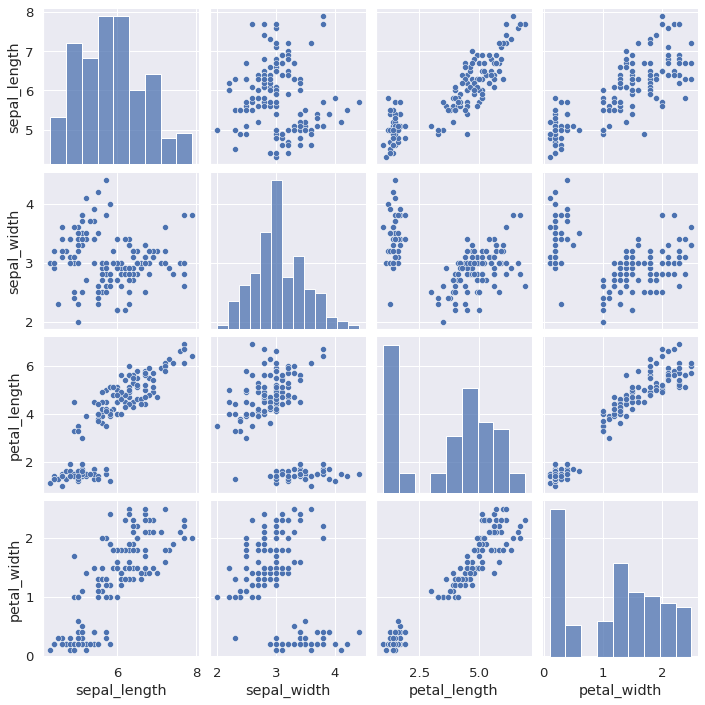

In [61]:
_ = sns.pairplot(data=df) #siatka wykresow

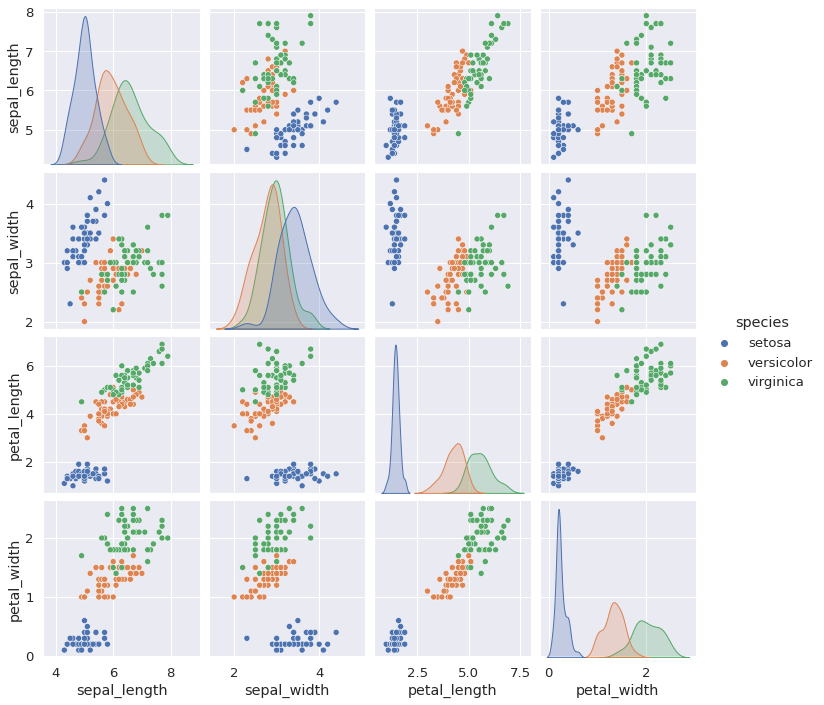

In [62]:
_ = sns.pairplot(data=df, hue='species') #koloruje w zaleznosci od gatunku